In [113]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency

# load dataset

In [114]:
 import warnings
warnings.filterwarnings('ignore')

In [115]:
boston = pd.read_csv(r"C:\Users\harshal\Desktop\BostonHousing1.csv", engine='python')
boston.head

<bound method NDFrame.head of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.9

In [116]:
boston.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')

In [117]:
boston.describe

<bound method NDFrame.describe of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  price  
0       15.3  396.90   4.98   24.0  
1       17.8  3

In [118]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [119]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [120]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.137174,0.069170,0.554695,6.263350,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.859947,0.253994,0.115878,0.745335,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,2.500000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.877250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.194000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [121]:
#check missing valus
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

# EDA

In [122]:
#correlation
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.195592,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533702,-0.042697,-0.516604,0.302069,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533702,1.000000,0.062926,0.763625,-0.367105,0.644774,-0.707972,0.595121,0.720824,0.383341,-0.356972,0.603853,-0.483777
chas,-0.055892,-0.042697,0.062926,1.000000,0.091203,0.093814,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763625,0.091203,1.000000,-0.276322,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.195592,0.302069,-0.367105,0.093814,-0.276322,1.000000,-0.235726,0.191820,-0.179868,-0.263320,-0.345699,0.109086,-0.582768,0.663109
age,0.352734,-0.569537,0.644774,0.086518,0.731470,-0.235726,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.707972,-0.099176,-0.769230,0.191820,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595121,-0.007368,0.611441,-0.179868,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720824,-0.035587,0.668023,-0.263320,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


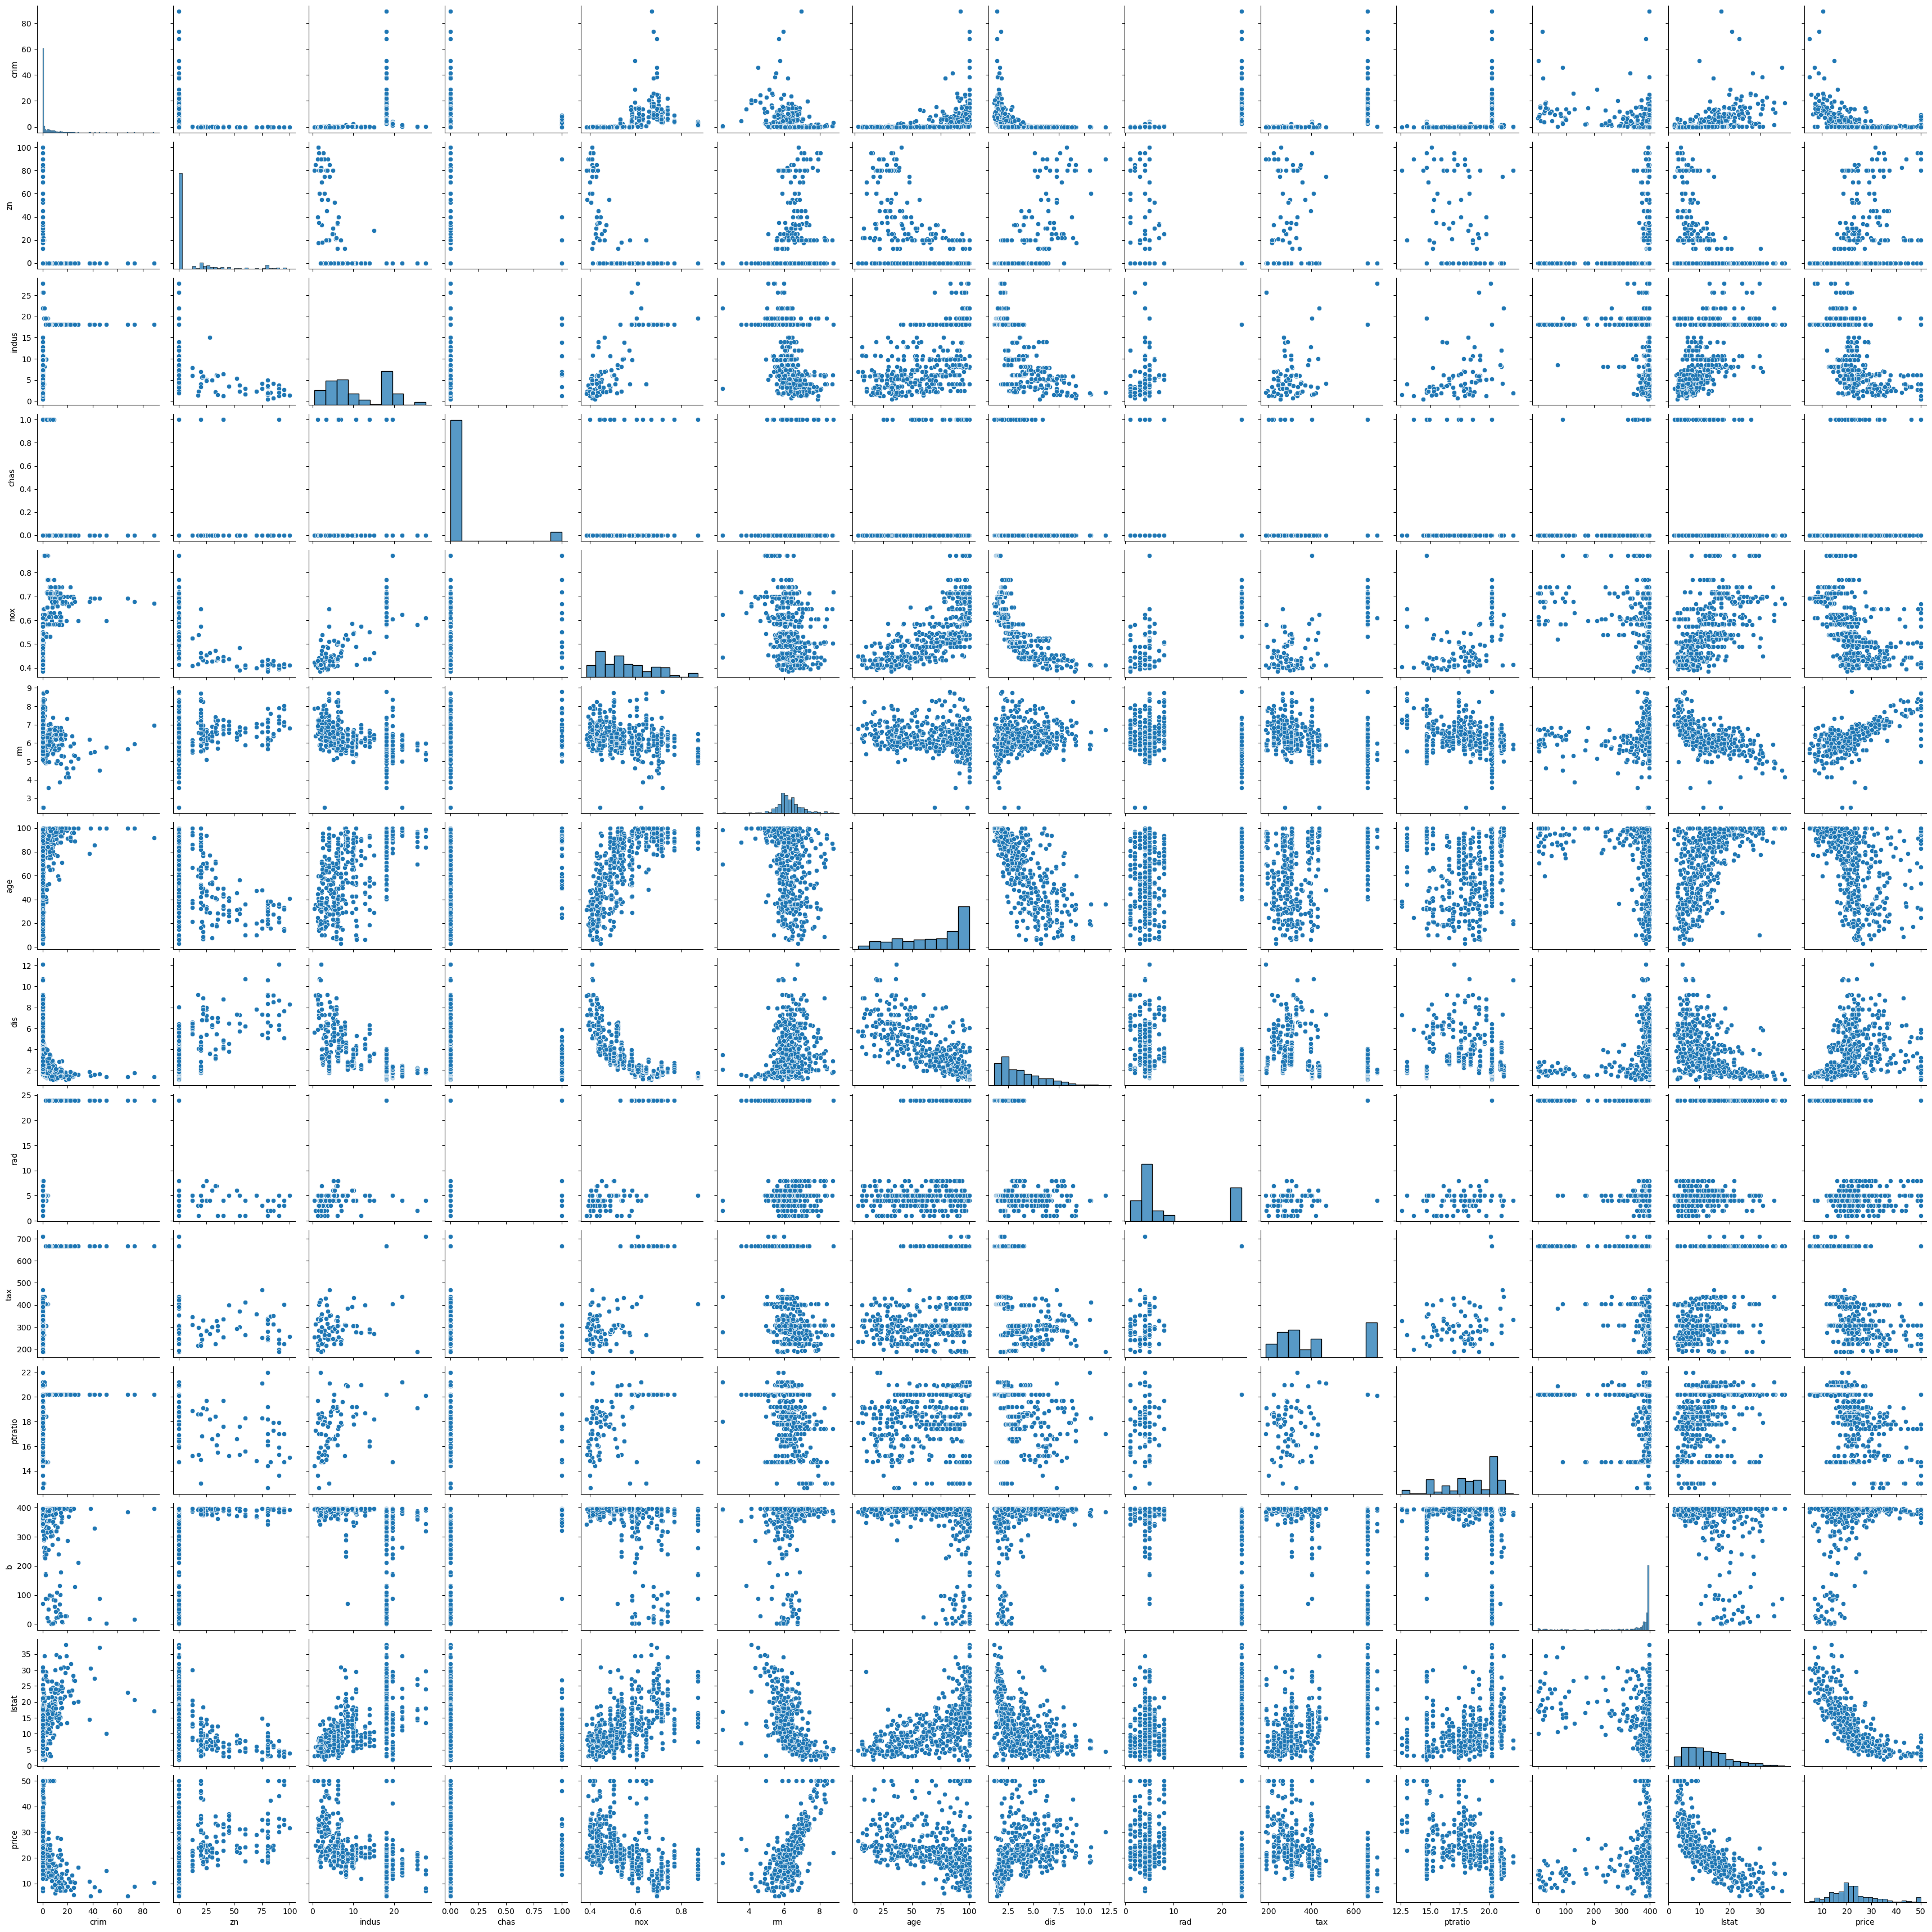

In [123]:
sns.pairplot(boston)

Text(0, 0.5, 'price')

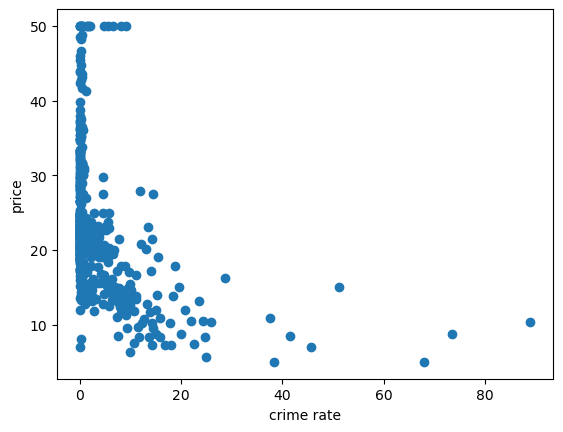

In [124]:
plt.scatter(boston['crim'],boston['price'])
plt.xlabel("crime rate")
plt.ylabel("price")

Text(0, 0.5, 'price')

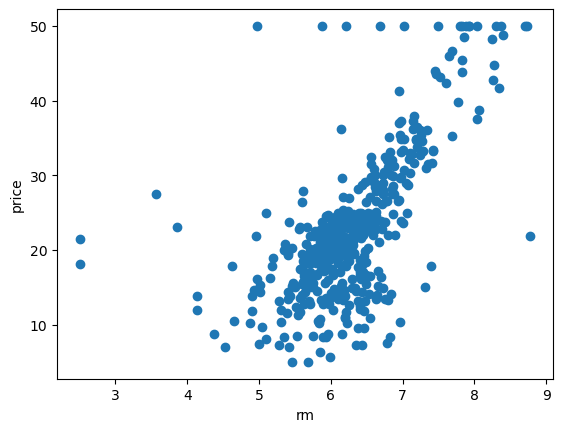

In [125]:
plt.scatter(boston['rm'],boston['price'])
plt.xlabel("rm")
plt.ylabel("price")

<Axes: xlabel='rm', ylabel='price'>

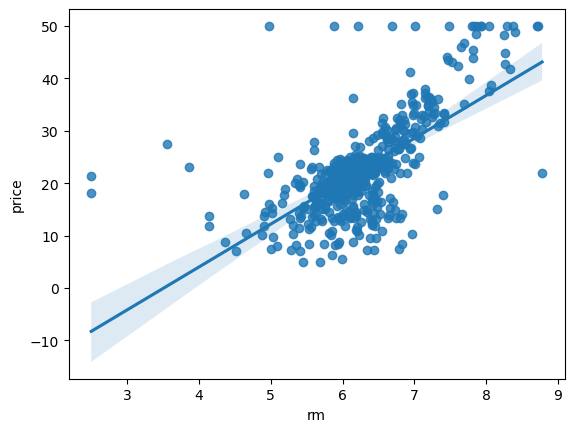

In [126]:
sns.regplot(x="rm",y="price",data=boston)

<Axes: xlabel='lstat', ylabel='price'>

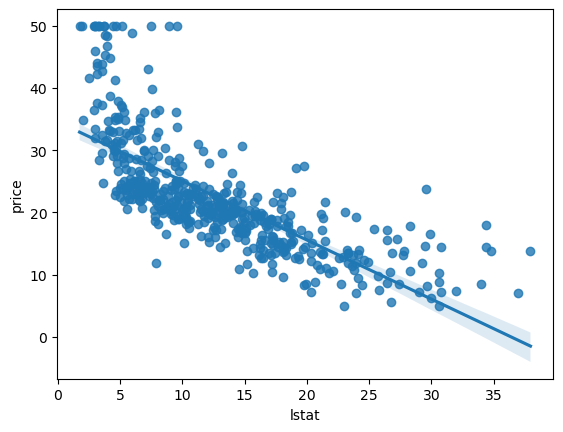

In [127]:
sns.regplot(x="lstat",y="price",data=boston)

<Axes: xlabel='chas', ylabel='price'>

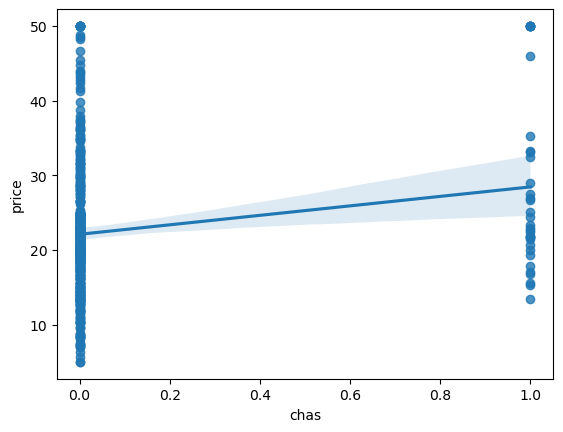

In [128]:
sns.regplot(x="chas",y="price",data=boston)

<Axes: xlabel='ptratio', ylabel='price'>

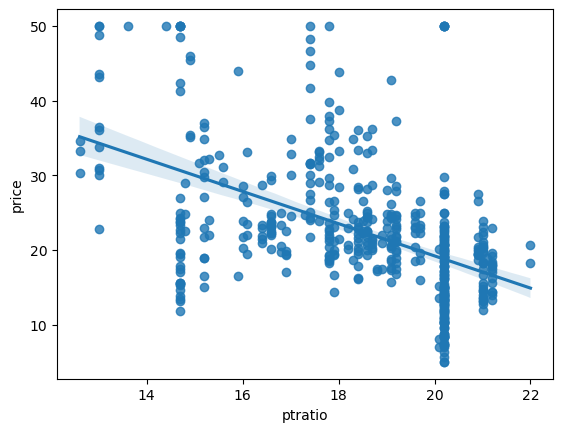

In [129]:
sns.regplot(x="ptratio",y="price",data=boston)

In [130]:
#independent and dependent features

X=boston.iloc[:,:-1]
y=boston.iloc[:,-1]


In [131]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [132]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

# train test split

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [134]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [135]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22


In [136]:
 y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: price, Length: 354, dtype: float64

In [137]:
 y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: price, Length: 152, dtype: float64

# standardize the dataset

In [138]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [139]:
X_train=scaler.fit_transform(X_train)

In [140]:
#we didn"t use fit in train as the model does not need to get much information about the test datse

In [141]:
X_test=scaler.transform(X_test)

In [144]:
X_train

array([[-0.41425879, -0.50512499, -1.29233068, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16217841, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60962056, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.31686783, ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00550127, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37146587, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [145]:
X_test

array([[-0.406801  , -0.50512499, -1.02242203, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68178865, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39690202, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71209925, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00550127, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00550127, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

# MODEL TRAINING

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
regession=LinearRegression()

In [148]:
regession.fit(X_train,y_train)

LinearRegression()

In [149]:
#print the coefficent and the intercept
print(regession.coef_)


[-1.13539508  0.87546832  0.21613002  0.82640317 -1.93285923  2.55070758
 -0.08264113 -3.06874779  2.0610921  -1.39581809 -2.08244163  1.00417269
 -4.19959294]


In [150]:
print(regession.intercept_)

23.015819209039552


In [151]:
 #which parameters tthe model has been trained
regession.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [152]:
#prediction with testdata
reg_pred=regession.predict(X_test)
reg_pred

array([29.1547037 , 36.66794895, 15.55110296, 25.54214778, 18.65301539,
       23.40171236, 17.62354567, 13.76709459, 23.23982156, 20.94597762,
       25.17433369, 18.75369694, -6.50195661, 21.85390606, 19.8747188 ,
       25.62924557, 20.420441  ,  6.01587954, 39.93629508, 17.46704613,
       27.57333095, 30.33774658, 11.21949128, 23.98772832, 18.2280436 ,
       16.53695779, 23.49209703, 14.04327108, 22.74237487, 19.76748533,
       23.11025126, 25.32767146, 24.60527785, 19.3356381 , 16.64241317,
       17.80940922, 30.73701379, 20.53968796, 24.06990288, 24.77072266,
       14.40375561, 32.04477064, 41.96710816, 18.08981194, 27.39167544,
       17.51949074, 14.31571584, 25.90998895, 20.30942106, 30.50070914,
       21.69700411, 34.06105372, 15.71146667, 26.15964121, 39.0316616 ,
       22.81972517, 18.89597051, 33.17186078, 24.97207063, 13.30237628,
       16.86695055, 30.41018968, 31.68602415, 16.85058386, 21.11170032,
       17.26322665, 20.13642524, 26.40576474, 31.3020537 , 11.99

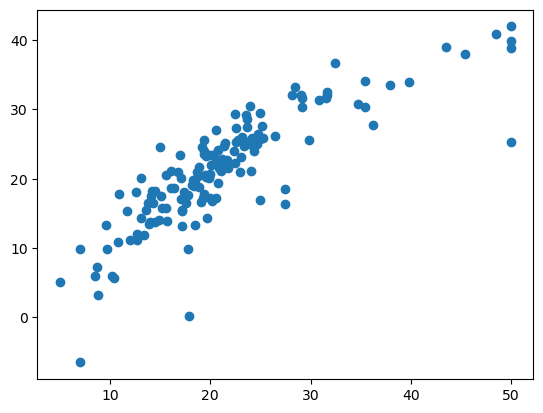

In [153]:
#plot a scatter for a predition model
plt.scatter(y_test,reg_pred)

In [154]:
#residuals
residuals=y_test-reg_pred
residuals

173    -5.554704
274    -4.267949
491    -1.951103
72     -2.742148
452    -2.553015
         ...    
441     0.068348
23      0.745045
225    11.171437
433    -2.154934
447    -5.555503
Name: price, Length: 152, dtype: float64

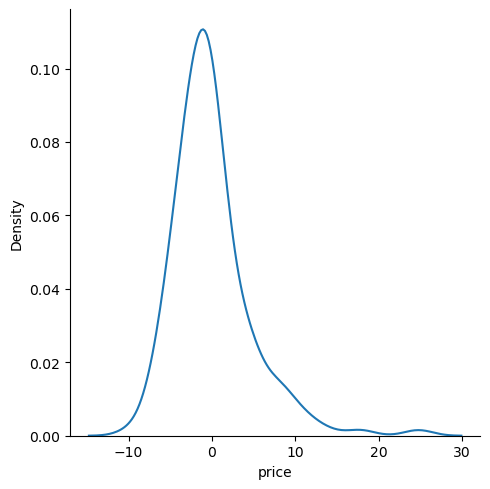

In [155]:
#plot this residuals

sns.displot(residuals,kind="kde")
#main assuption is to get the normal distribution of the dataset

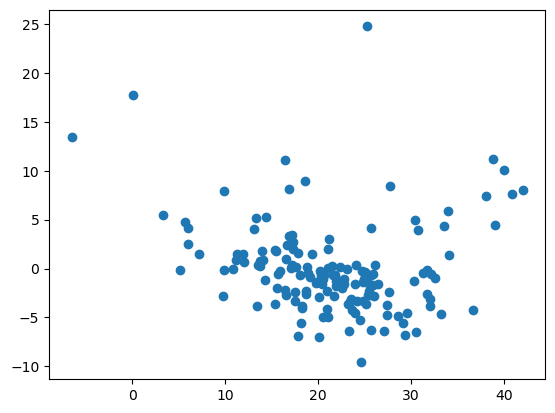

In [156]:
#scatter plot with respect to prediction and residuals
#uniform distribution
plt.scatter(reg_pred,residuals)#are evenly distributed

In [157]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

21.81839120722691
3.2432459303507697
4.671016078673559


# r square and adusted r aquare

In [158]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)
#the more towards the better the score is

0.7071871589691966


In [159]:
# display adjusted r squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6796033406112223

In [160]:
#adjusted r2 < r2 this the property 

# NEW DATA PREDICTION

In [250]:
X.iloc[0].to_numpy().reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [255]:
print(X.shape[1])  # Check the number of features in the original data (X)
print(X.iloc[0].shape[0])  # Check the number of features in the input data for transformation


13
13


In [257]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)  # Use the correct dataset with 14 features


StandardScaler()

In [259]:
transformed_data = scaler.transform(X.iloc[0].to_numpy().reshape(1, -1))
transformed_data

array([[-0.41978194,  0.28482986, -1.28804344, -0.27259857, -0.14421743,
         0.41854836, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ]])

In [260]:
regession.predict(transformed_data)

array([31.06695367])

# PICKLING THE MODEL FILE FOR DEPLOYMENT

In [251]:
import pickle

In [252]:
pickle.dump(regession,open('regmodel.pk1','wb'))

In [253]:
pickled_model=pickle.load(open('regmodel.pk1','rb'))

In [261]:
pickled_model.predict(transformed_data)

array([31.06695367])